# Exploring MRI data and labels
3D MRI brain scans from the public [Medical Segmentation Decathlon](https://decathlon-10.grand-challenge.org/) challenge project.


<img src="images/mri-slice.png" alt="U-net Image" width="300"/>

### Importing packages

In [ ]:
pip install nibabel

In [4]:
pip install itk

   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/38.1 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.1 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.1 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.1 MB 1.6 MB/s eta 0:00:24
   ---------------------------------------- 0.1/38.1 MB 554.9 kB/s eta 0:01:09
   ---------------------------------------- 0.3/38.1 MB 923.9 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.1 MB 923.9 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.1 MB 923.9 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.1 MB 923.9 kB/s eta 0:00:41
   ---------------------------------------- 0.3/38.1 MB 700.8 kB/s eta 0:00:54
   ---------------------------------------- 0.4/38.1 MB 757.8 kB/s eta 0:00:50


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
pip install itkwidgets

INFO: pip is looking at multiple versions of ipython to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.4 MB ? eta -:--:--
   - -------------------------------------- 0.1/3.4 MB 1.1 MB/s eta 0:00:04
   - -------------------------------------- 0.1/3.4 MB 1.3 MB/s eta 0:00:03
   - -------------------------------------- 0.1/3.4 MB 1.3 MB/s eta 0:00:03
   - -------------------------------------- 0.1/3.4 MB 1.3 MB/s eta 0:00:03
   -- ------------------------------------- 0.2/3.4 MB 731.4 kB/s eta 0:00:05
   --- ------------------------------------ 0.3/3.4 MB 862.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/3.4 MB 862.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/3.4 MB 862.0 kB/s eta 0:00:04
   --- ------------------------------------ 0.3/3.4 MB 654.6 kB/s eta 0:00:05
   ----- ---------------


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
import numpy as np
import nibabel as nib
import itk
import itkwidgets
from ipywidgets import interact, interactive, IntSlider, ToggleButtons
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

# 1 Exploring the data

### 1.1  Loading images of the Brain
Grabbing a single 3D MRI brain scan

In [10]:
image_path = "data\BraTS-Data\imagesTr\BRATS_001.nii.gz"
image_obj = nib.load(image_path)
print(f"Type of the image {type(image_obj)}")

Type of the image <class 'nibabel.nifti1.Nifti1Image'>


invalid escape sequence '\B'
invalid escape sequence '\B'
invalid escape sequence '\B'


### 1.2 Extracting the data as a numpy array

In [11]:
# Extracting the data using the get_fdata() method of the image object
image_data = image_obj.get_fdata()
type(image_data)

numpy.ndarray

In [12]:
# get the image shape 
height, width, depth, channels = image_data.shape
print(f"the image object has these dimensions: \n height:{height} \n widht:{width} \n depth:{depth} \n channels:{channels}")

the image object has these dimensions: 
 height:240 
 widht:240 
 depth:155 
 channels:4


### 1.3 Visualise the data
The "depth" indicated that there are 155 layers (slices through the brain) in every image object.


Displaying layer 49 Channel 0 of Image


(-0.5, 239.5, 239.5, -0.5)

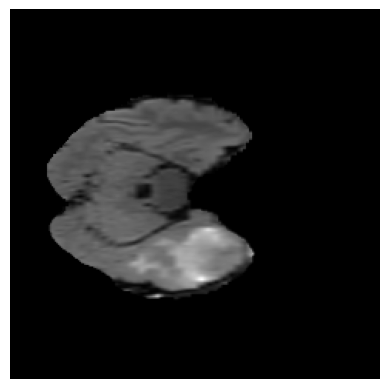

In [13]:
# select a random layer number
maxval = 154
i = np.random.randint(0,maxval)

# defining a channel to look at
channel = 0
print(f"Displaying layer {i} Channel {channel} of Image")
plt.imshow(image_data[:,:,i,channel], cmap='gray')
plt.axis('off')

#### 1.3.1 Interactive Exploration

In [14]:
# define function to visualise the data
def explore_3dimage(layer):
    plt.figure(figsize=(10,5))
    channel=3
    plt.imshow(image_data[:,:,layer,channel],cmap='gray')
    plt.title("explore layers of brain mri", fontsize=20)
    plt.axis('off')
    return layer

# running the ipywidget's interact() function to explore the data
interact(explore_3dimage, layer=(0,image_data.shape[2]-1))

interactive(children=(IntSlider(value=77, description='layer', max=154), Output()), _dom_classes=('widget-inte…

<function __main__.explore_3dimage(layer)>

## 2. Explore the data lables
We'll load a new dataset containing the lables for the MRI scan we loaded above

In [15]:
# define the data path and load the data
label_path = "data/BraTS-Data/labelsTr/BRATS_001.nii.gz"
label_obj = nib.load(label_path)
type(label_obj)

nibabel.nifti1.Nifti1Image

### Extract the data labels as a numpy array

In [16]:
# using the get_fdata() method of the image object
label_array = label_obj.get_fdata()
type(label_array)

numpy.ndarray

In [17]:
# extract andprint out the shape of the labels data
height, width, depth = label_array.shape
print(f"dinemsionsof the labels data array: height: {height}, widht: {width}, depth:{depth} ")
print(f"with the unique values: {np.unique(label_array)}")
print(""" Corresponding to the following label categories:
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor""")

dinemsionsof the labels data array: height: 240, widht: 240, depth:155 
with the unique values: [0. 1. 2. 3.]
 Corresponding to the following label categories:
0: for normal 
1: for edema
2: for non-enhancing tumor 
3: for enhancing tumor


### 2.2 Visualize the lables for a specificlayer
Visualising a single layer of the labeled data

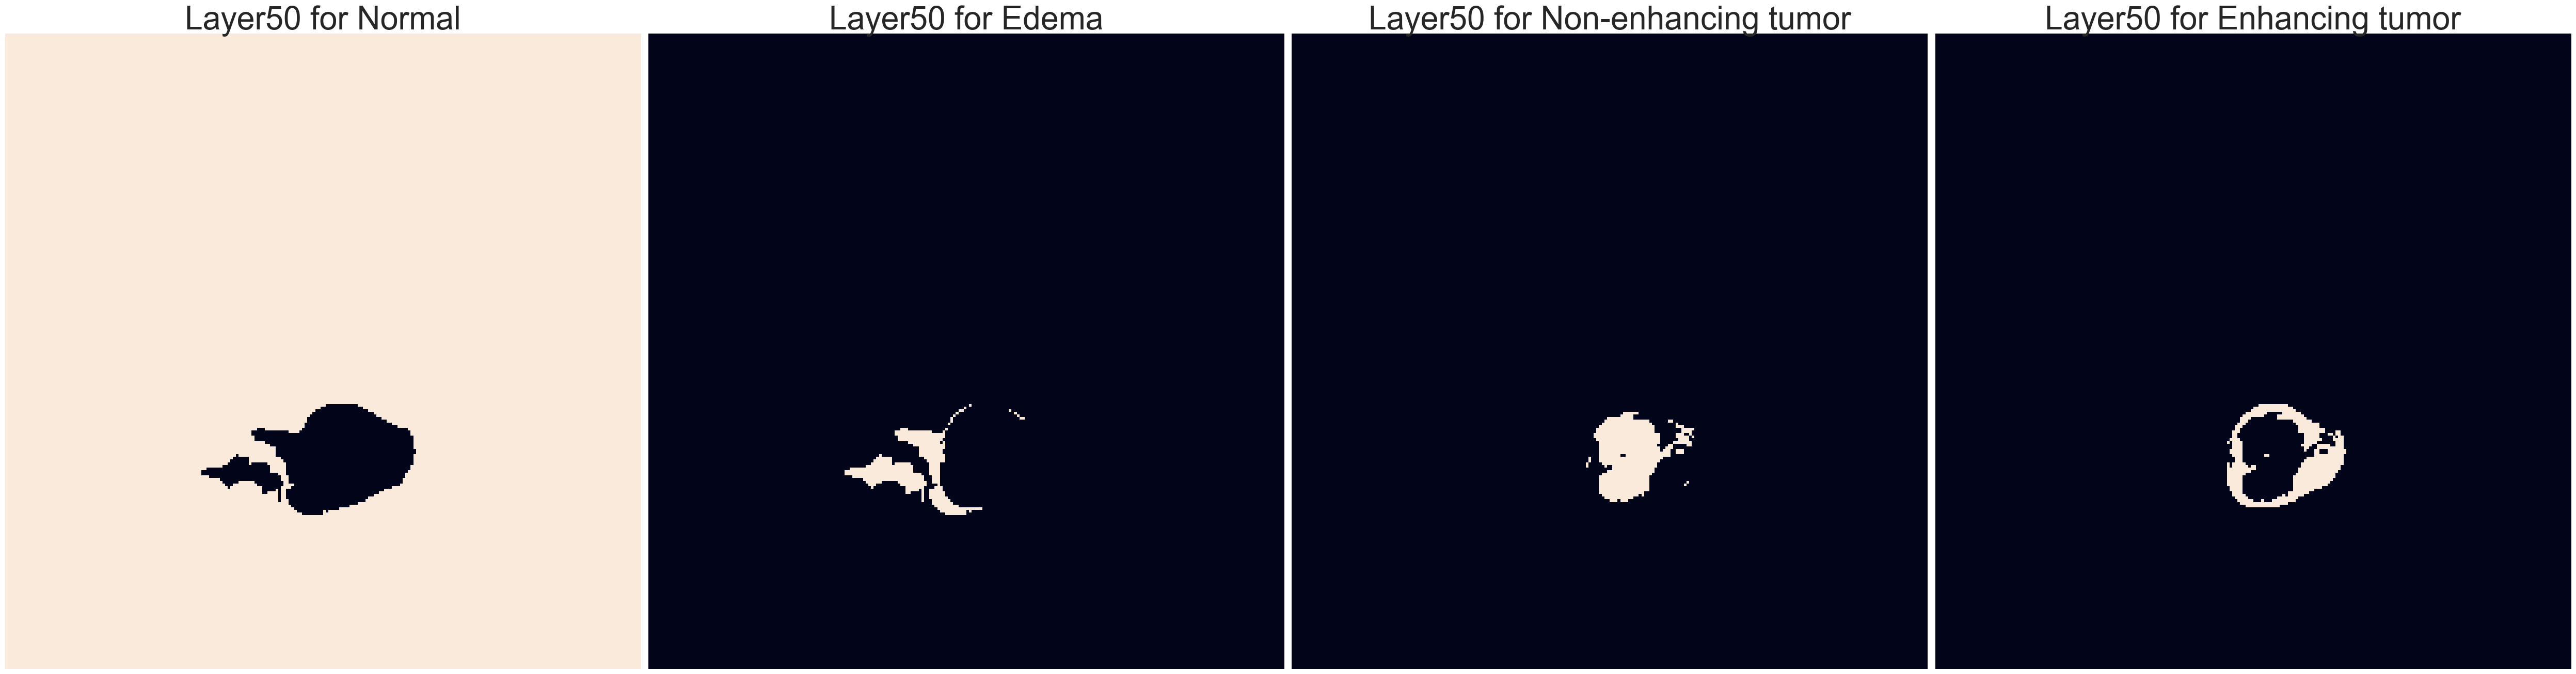

In [19]:
# define a single layer to look at
layer = 50
# define a dictionary of class labels
classes_dict = {
    'Normal': 0.,
    'Edema': 1.,
    'Non-enhancing tumor': 2.,
    'Enhancing tumor': 3.
}
# set up for plotting
fix,ax = plt.subplots(nrows=1, ncols=4, figsize=(50,30))
for i in range(4):
    # converted to list and extracted ith
    img_label_str = list(classes_dict.keys())[i]
    img = label_array[:,:,layer]
    #where that img is equal to the img_label string
    mask = np.where(img==classes_dict[img_label_str],255,0)
    ax[i].imshow(mask)
    ax[i].set_title(f"Layer{layer} for {img_label_str}", fontsize=45)
    ax[i].axis('off')
plt.tight_layout()

#### 2.2.1 Interactive Visualisation across layers
here we can choose the class we want to look at by clicking a button to choose a particular label and scrolling across layers using the slider

In [21]:
# create button values
select_classes=ToggleButtons(
    options=['Normal','Edema', 'Non-enhancing tumor', 'Enhancing tumor'],
    description= 'Select Class:',
    disabled=False,
    button_style='info',
)

# create layer slider
select_layer = IntSlider(min=0, max=154, description ="Select Layer", continuous_update=False)

# define a function for plotting images
def plot_image(seg_class,layer):
    print(f"displaying {layer} layer label:{seg_class}")
    img_label = classes_dict[seg_class]
    mask = np.where(label_array[:,:,layer] == img_label, 255, 0)
    plt.figure(figsize=(10,5))
    plt.imshow(mask, cmap='gray')
    plt.axis("off")

# using interactive() to create the visualisation 
interactive(plot_image, seg_class=select_classes, layer =select_layer)

interactive(children=(ToggleButtons(button_style='info', description='Select Class:', options=('Normal', 'Edem…

We mark the completion of data exploration step